In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("customer_booking.csv",encoding="ISO-8859-1")

In [3]:
df.head(15)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0


In [75]:
df.tail(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49990,1,Internet,RoundTrip,12,6,10,6,PERPNH,Australia,0,0,0,5.62,0
49991,1,Internet,RoundTrip,8,6,6,1,PERPNH,Australia,0,1,0,5.62,0
49992,1,Internet,RoundTrip,14,6,12,5,PERPNH,Australia,1,0,0,5.62,0
49993,1,Internet,RoundTrip,19,6,12,7,PERPNH,Australia,1,0,0,5.62,0
49994,2,Internet,RoundTrip,25,6,9,7,PERPNH,Australia,0,0,0,5.62,0
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,4,PERPNH,Australia,0,1,0,5.62,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.flight_day.unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [9]:
# INSIGHTS

# The number of passengers in each booking is only between 1-3,MAXIMUM BEING 1
# The average number of days before a purchase is made is 51 days
# The length of stay averages at 17 days
# 50% of flights taken are on thursday
# The flight duration averages at 7.57 hours
#50% flights are taken at 9 am


In [10]:
df['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [11]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [12]:
df.duplicated().sum()

719

In [13]:
duplicate=df.duplicated().value_counts()
duplicate

False    49281
True       719
dtype: int64

In [14]:
719/49281

0.014589801343316897

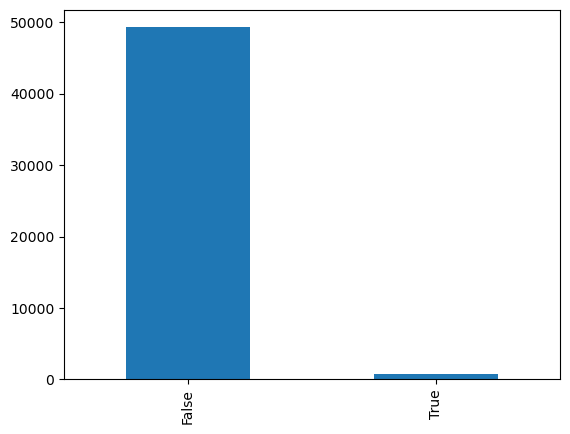

In [15]:
duplicate.plot(kind='bar')
plt.show()

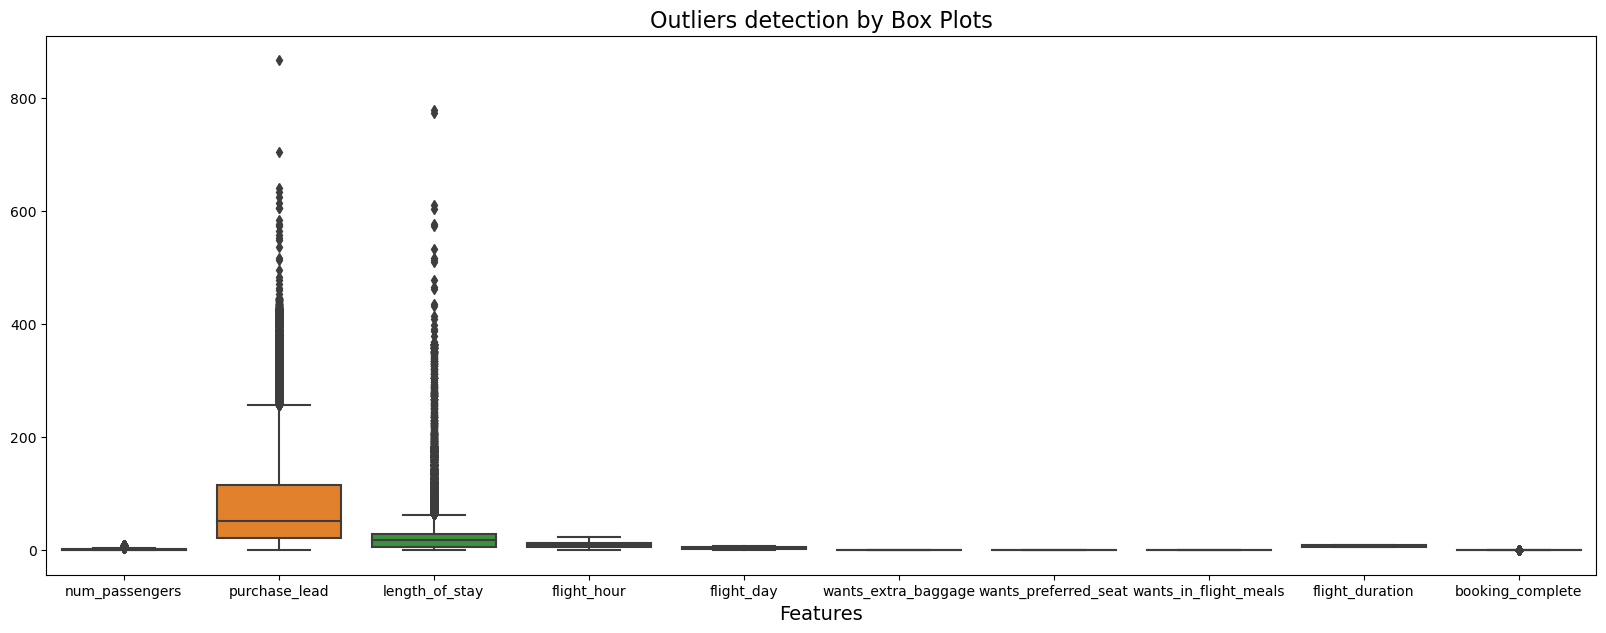

In [16]:
#Random forest is quite robust to outliers,yet lets check the outlier
#ratio
plt.figure(figsize=(20,7))
sns.boxplot(data = df)
plt.xlabel("Features", size = 14)
plt.title("Outliers detection by Box Plots", size = 16)
plt.show()
#only two columns have extreme outliers,but lets check the other 
#parameters before removing them

## VISUALIZATION

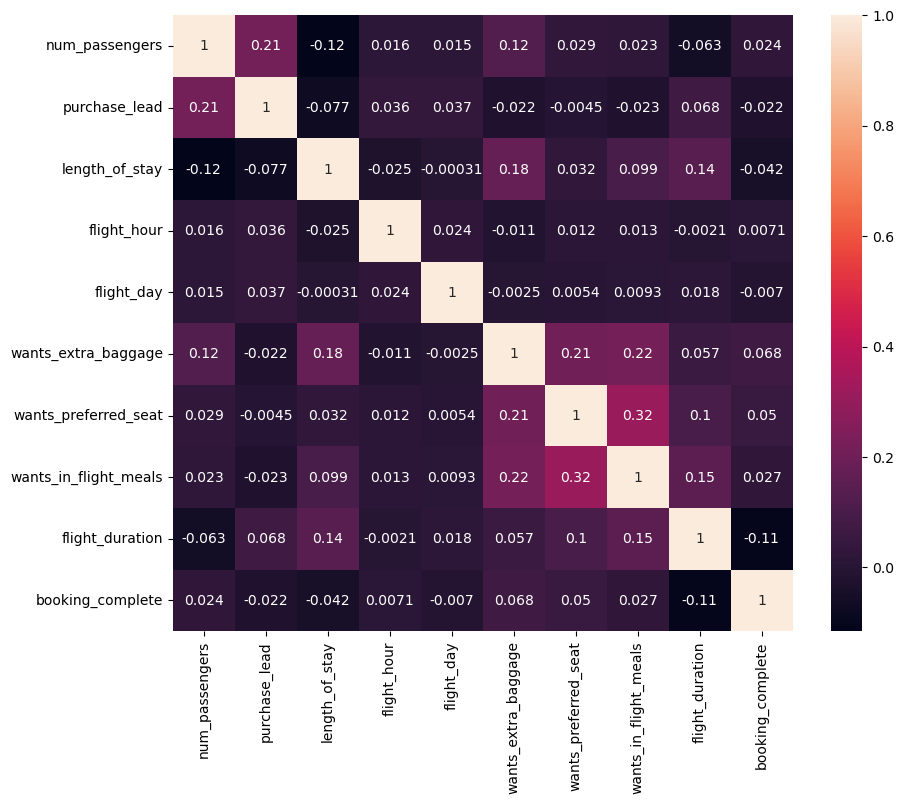

In [17]:
#Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [18]:
!pip install sweetviz

In [19]:
import sweetviz

                                             |      | [  0%]   00:00 -> (? left)


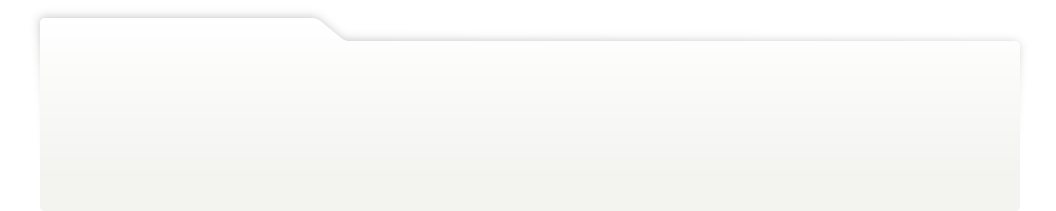
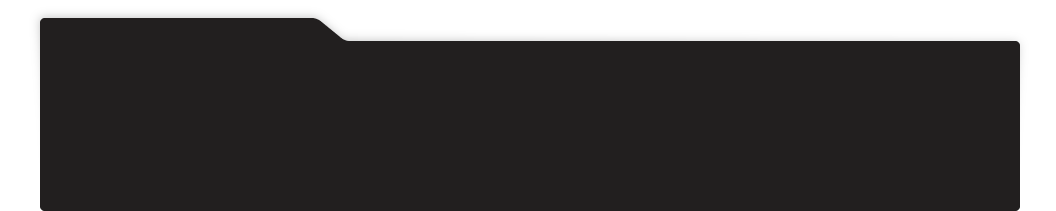
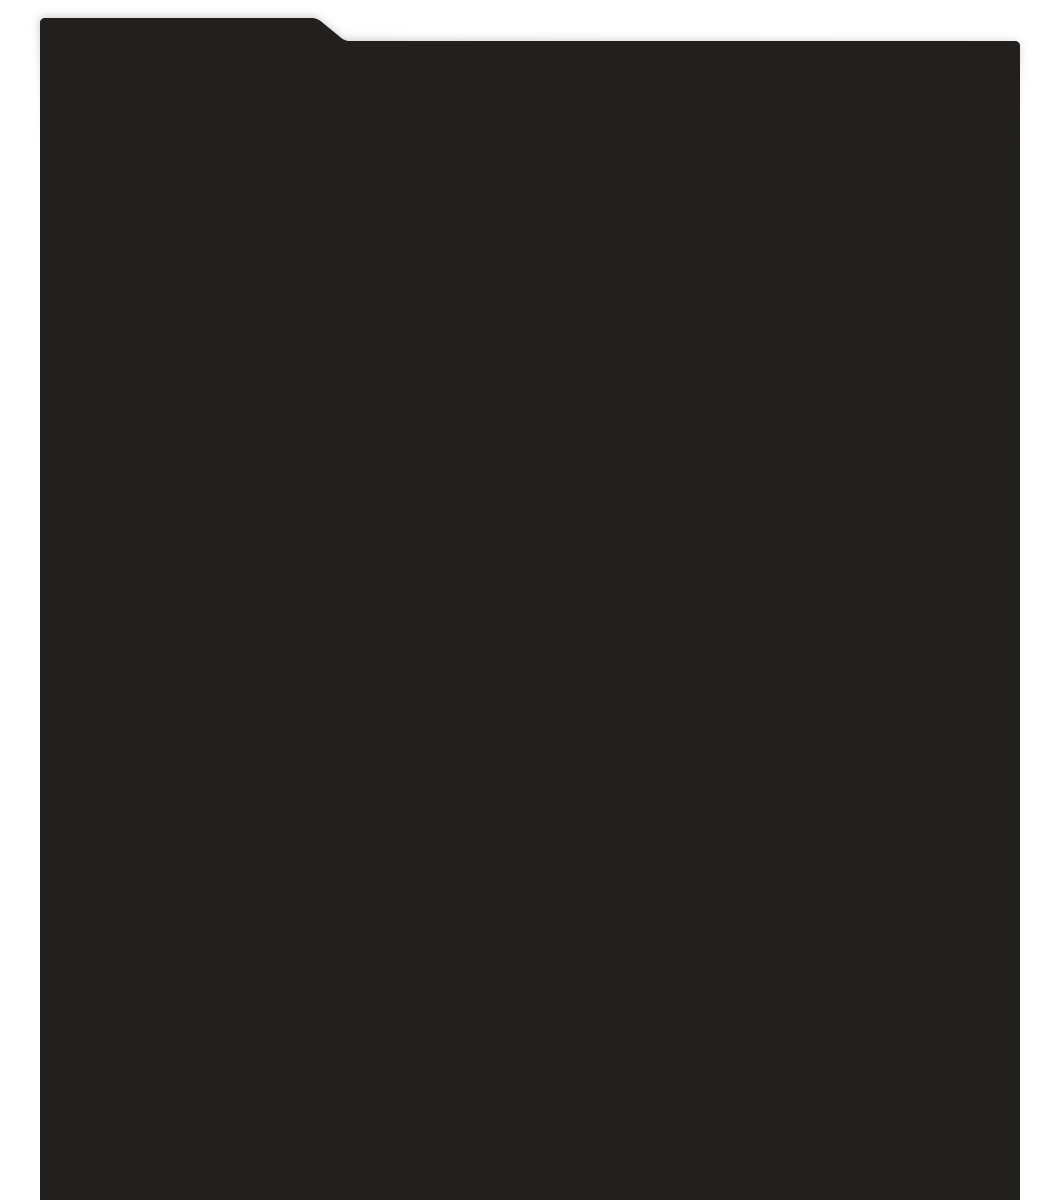
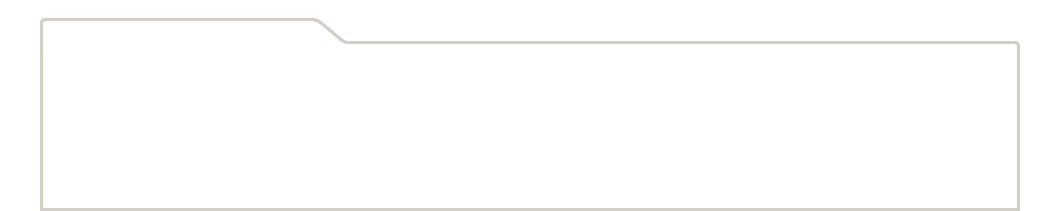
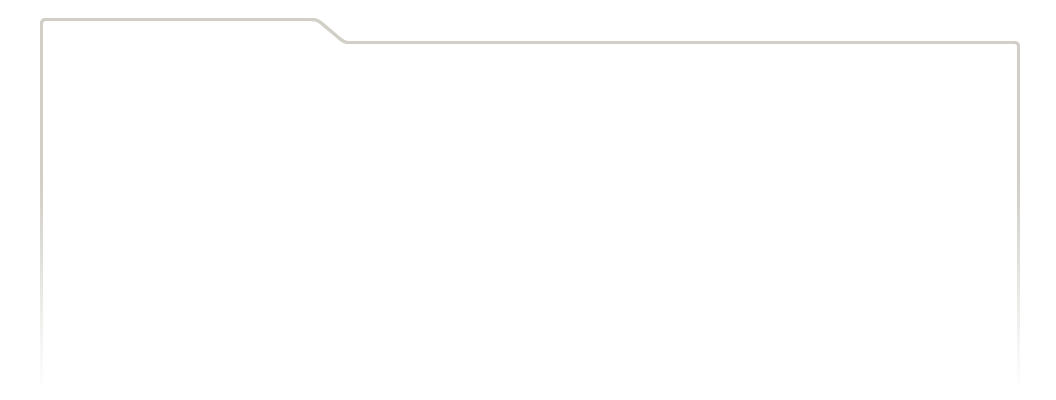
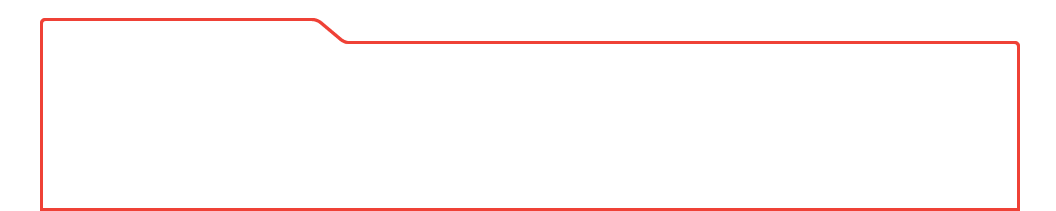
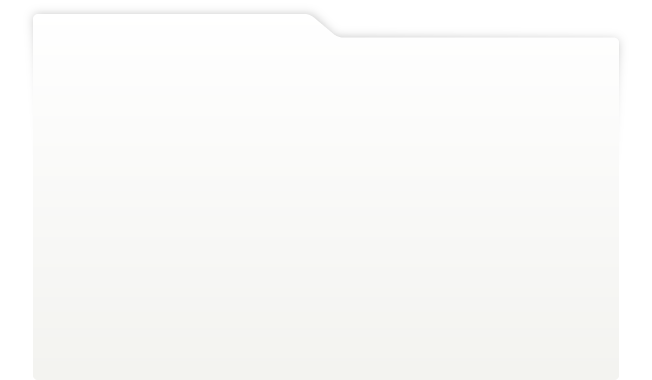
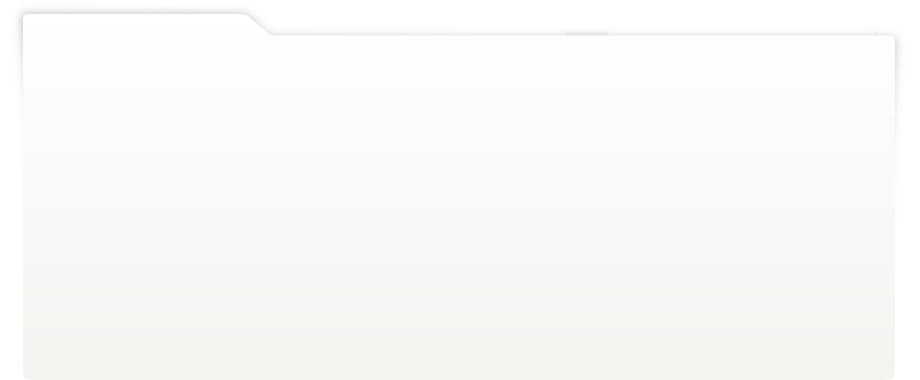
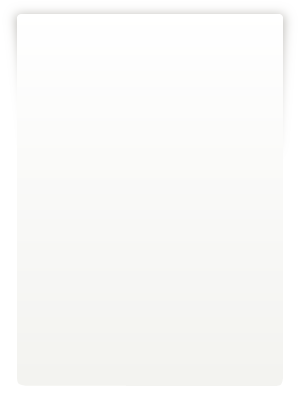
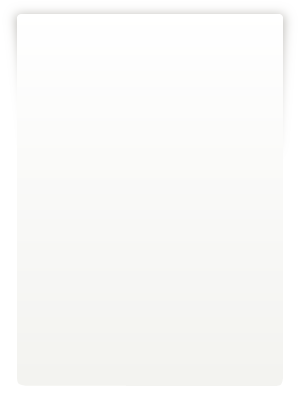
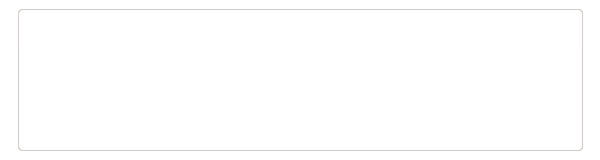
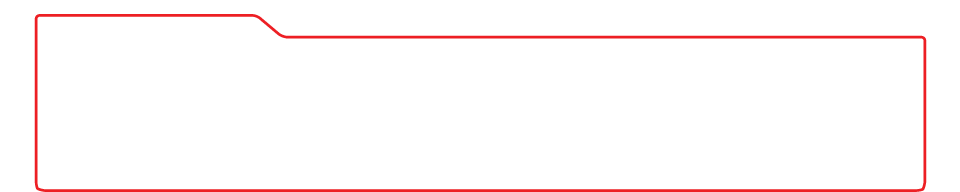
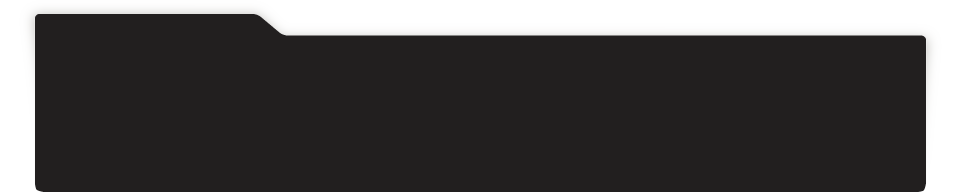
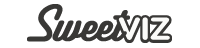
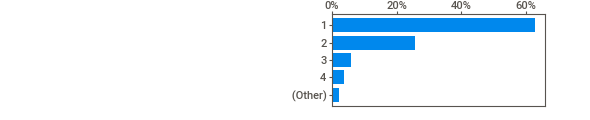
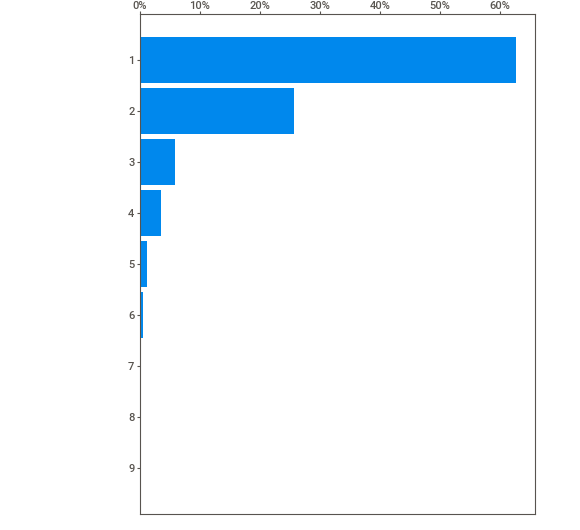
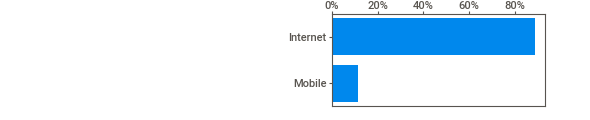
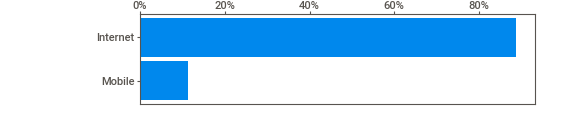
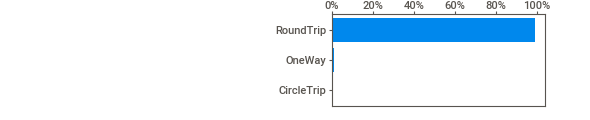
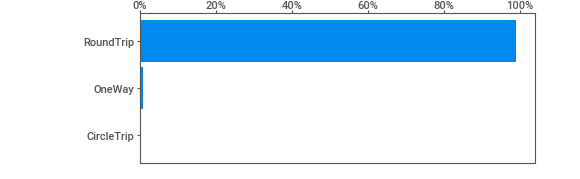
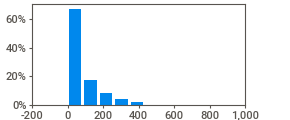
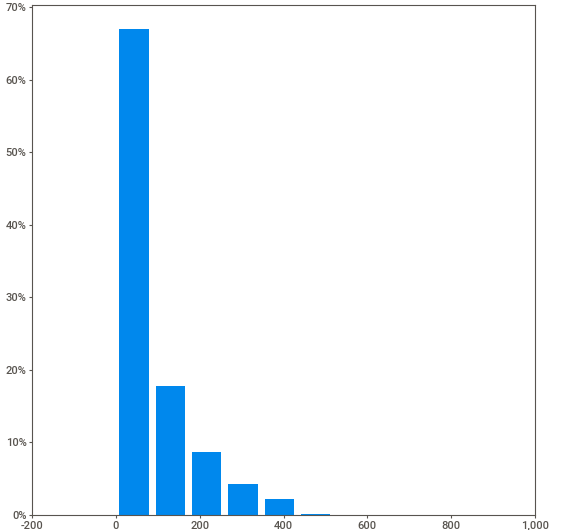
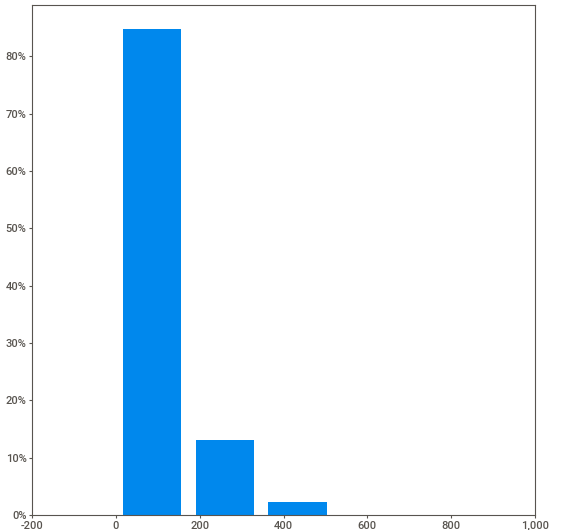
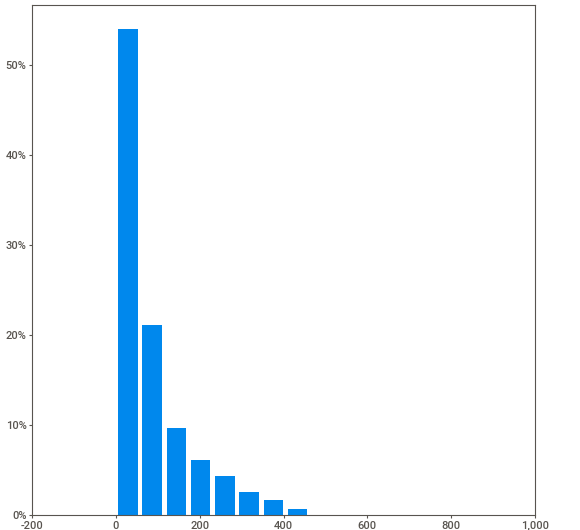
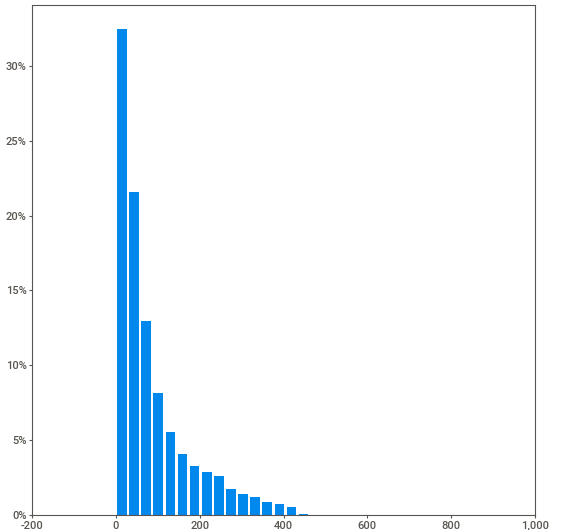
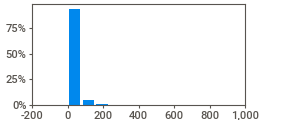
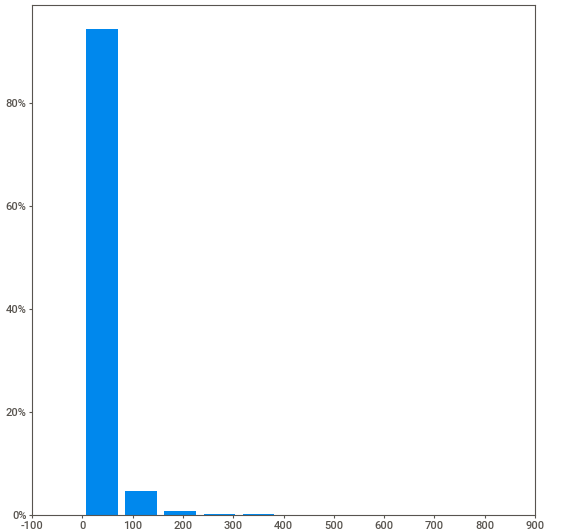
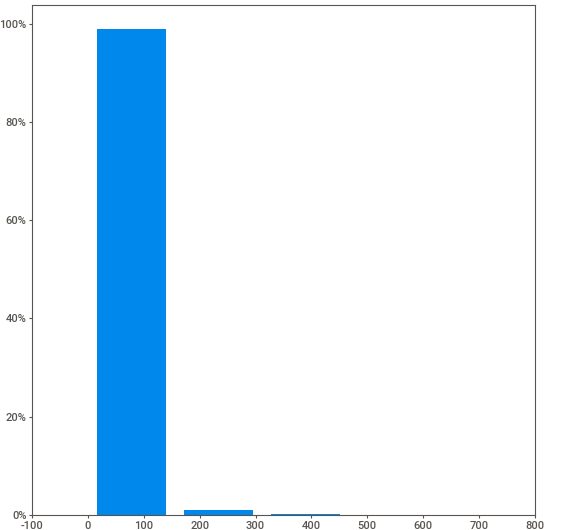
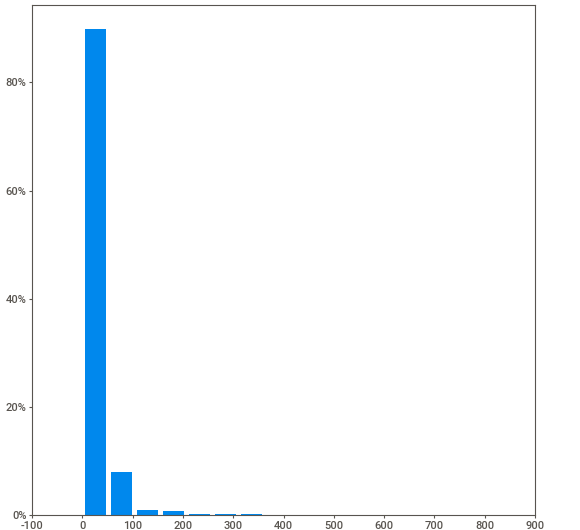
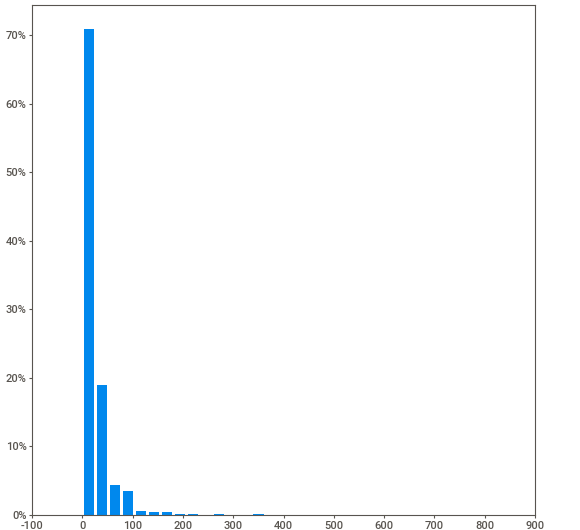
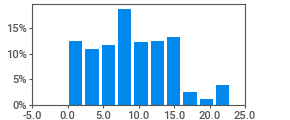
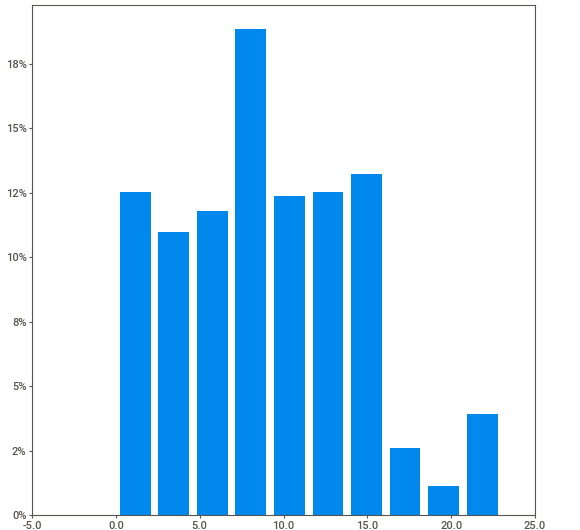
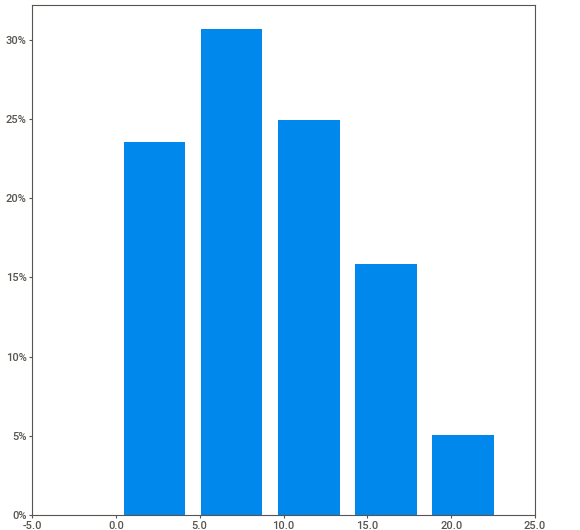
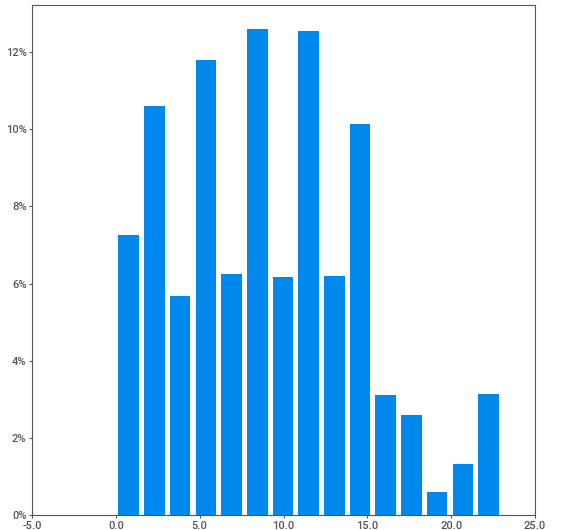
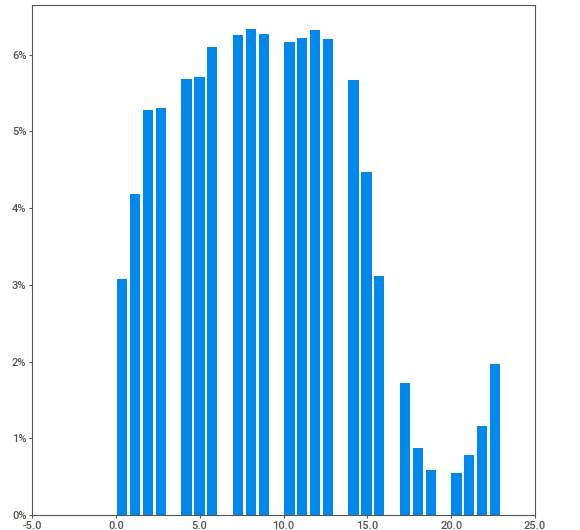
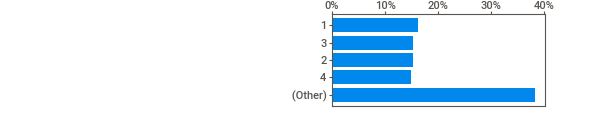
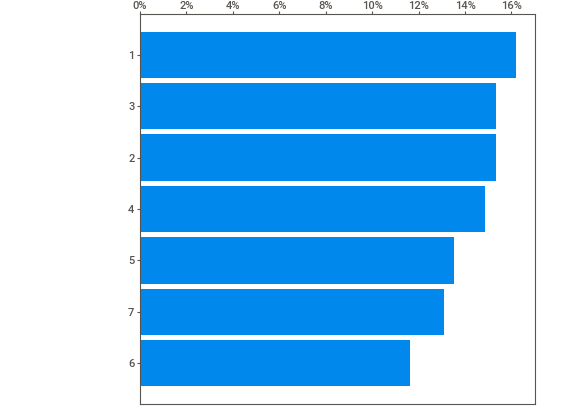
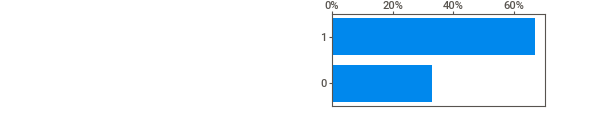
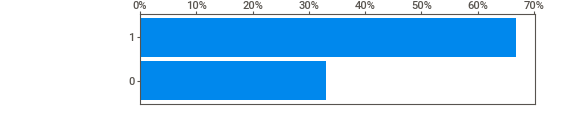
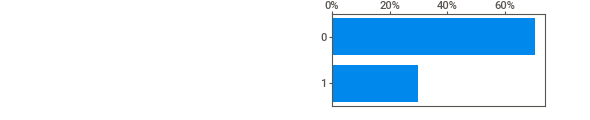
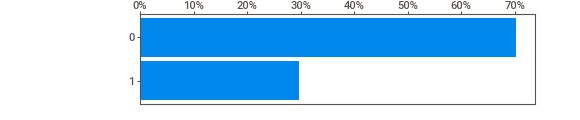
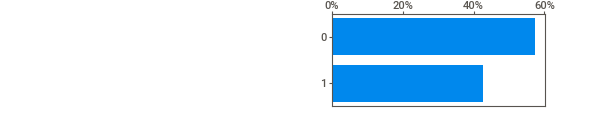
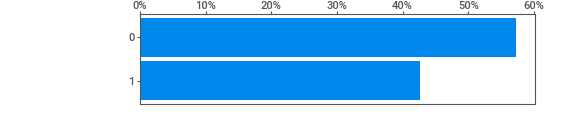
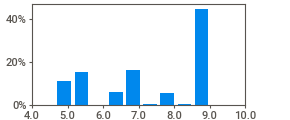
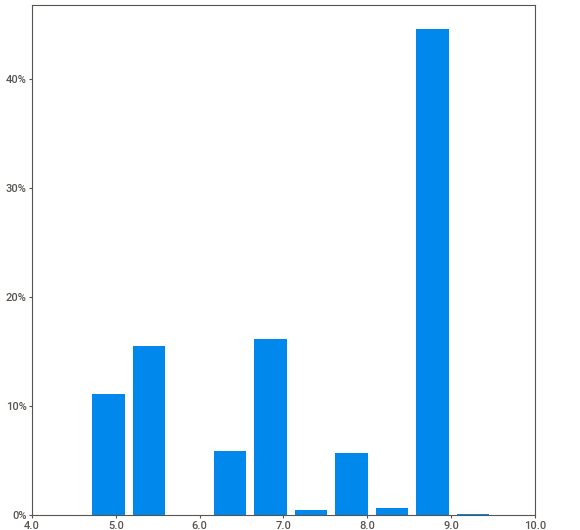
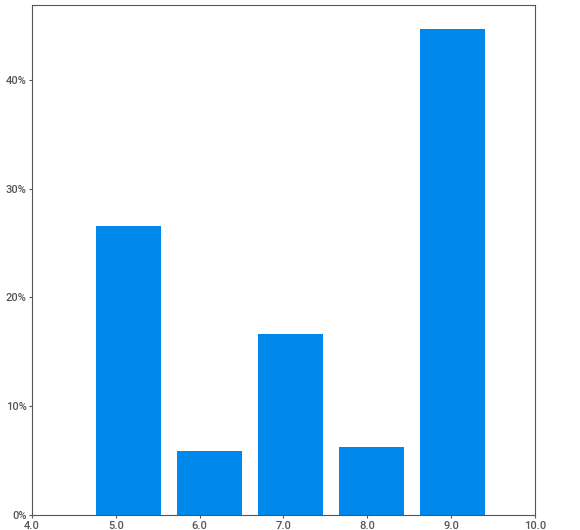
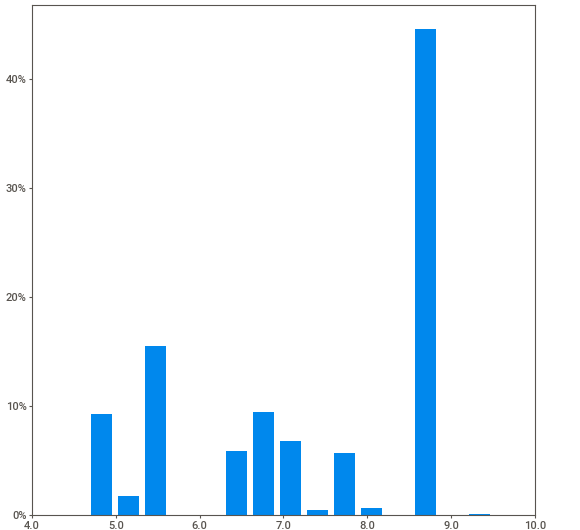
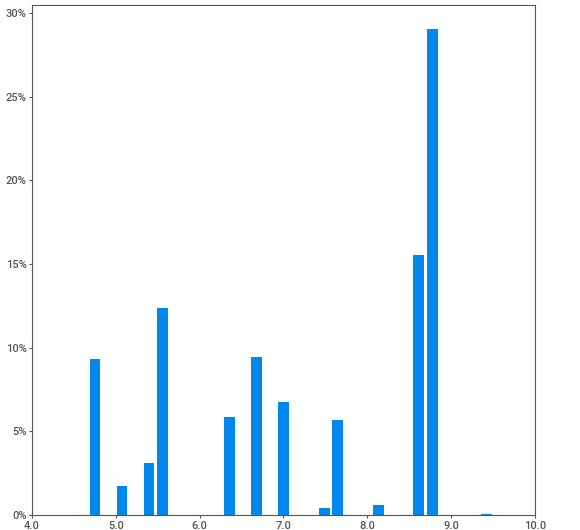
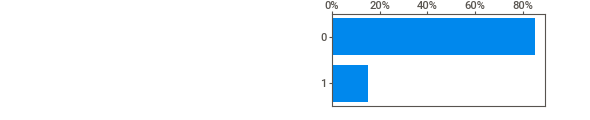
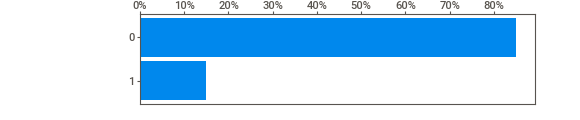
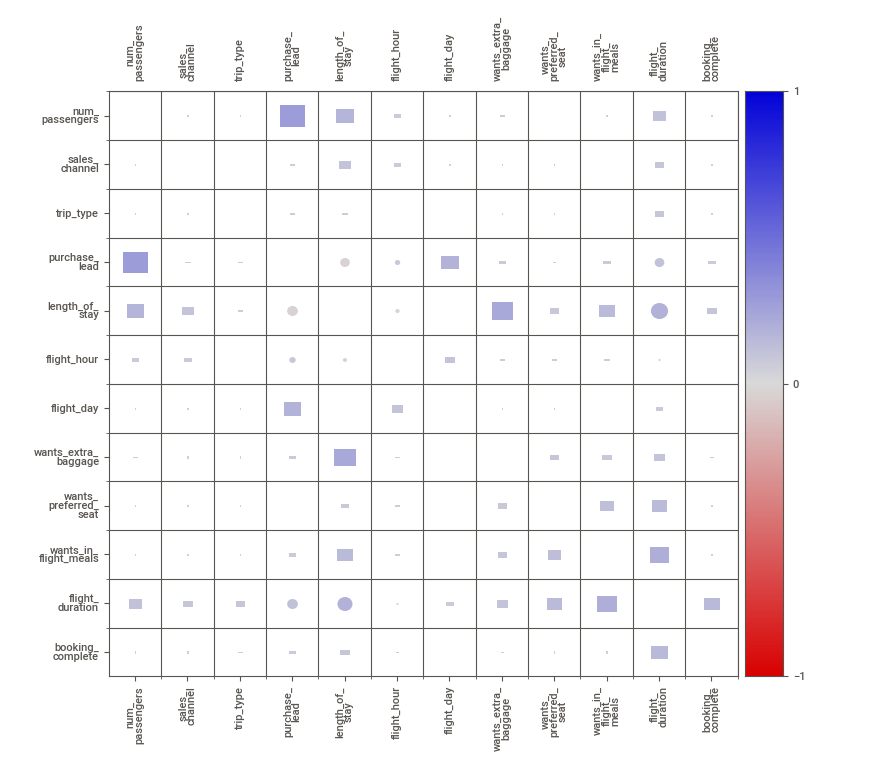
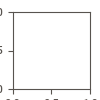

In [20]:
viz=sweetviz.analyze(df)
viz.show_notebook()


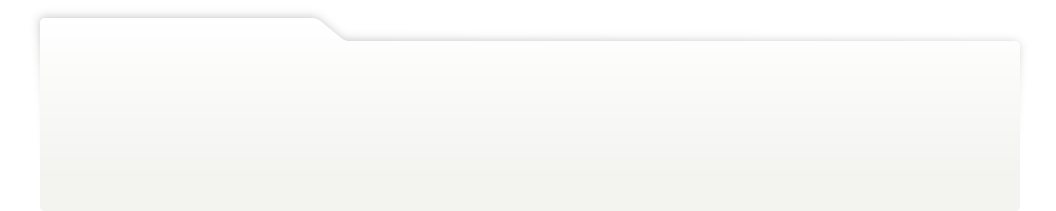
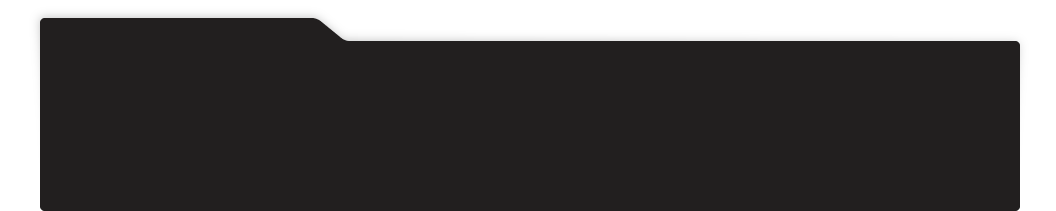
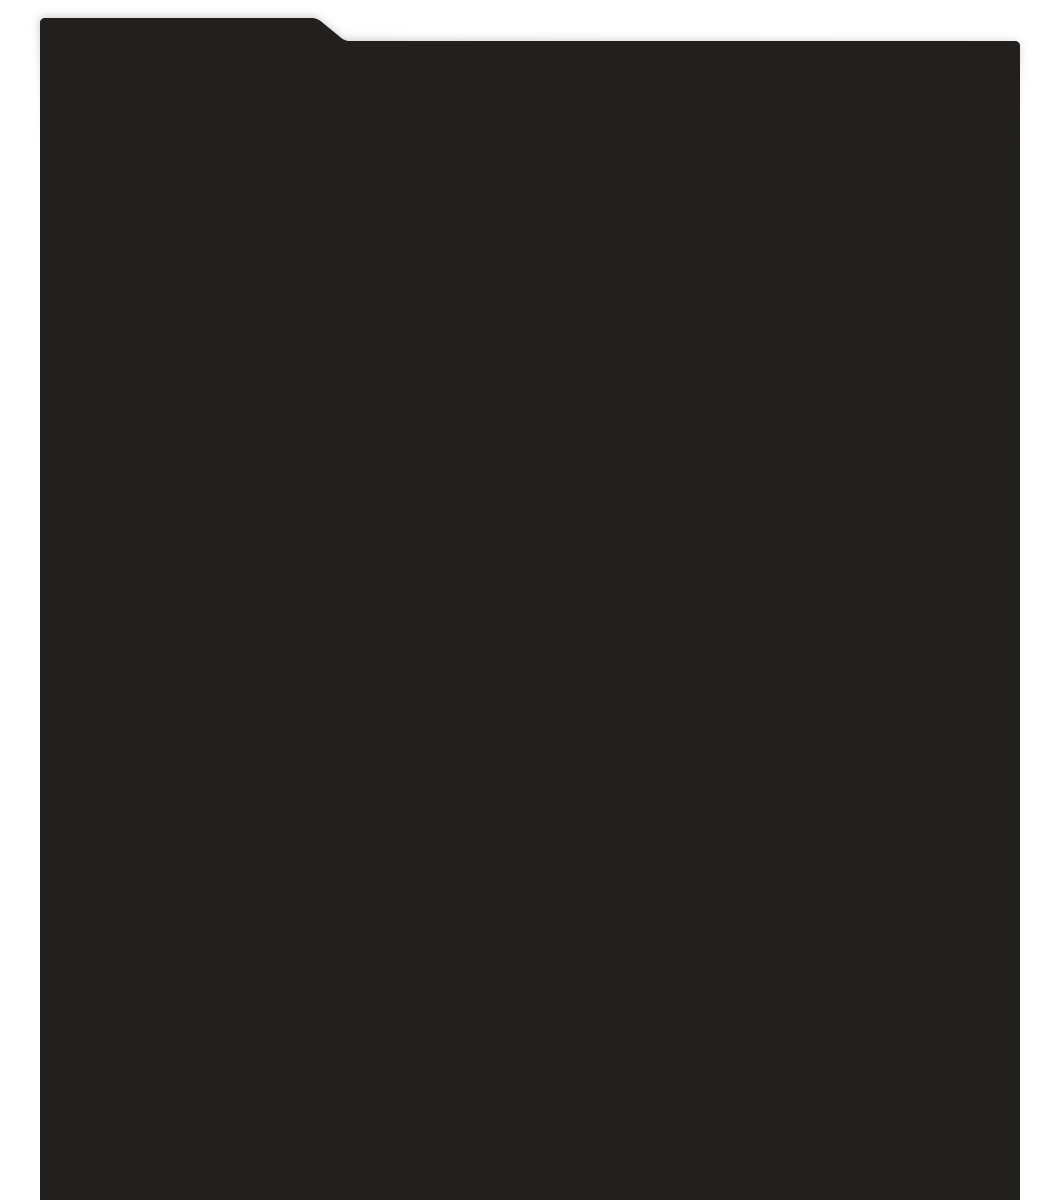
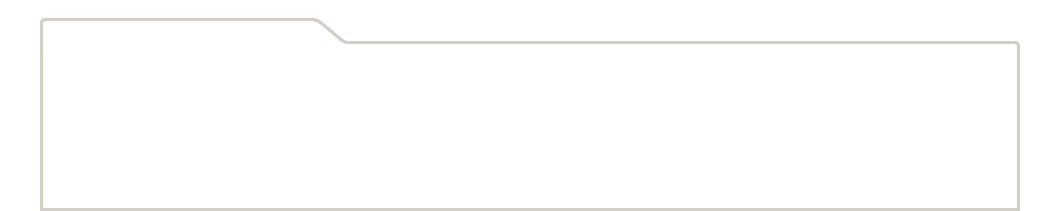
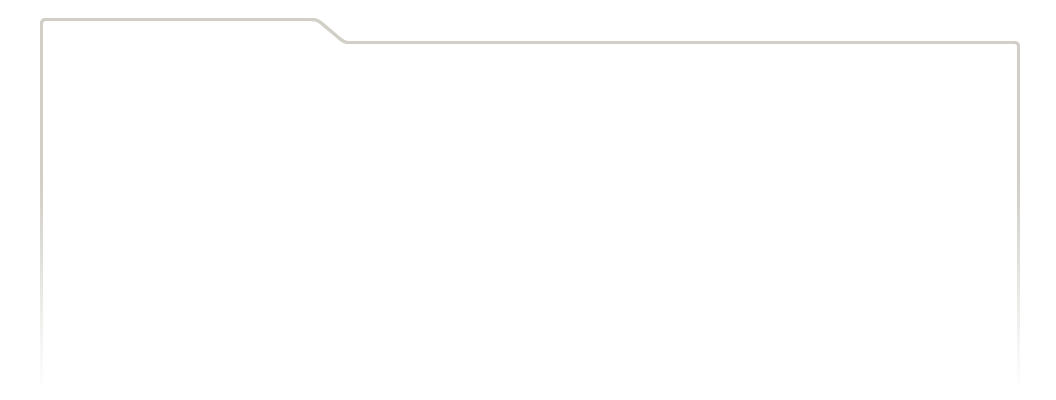
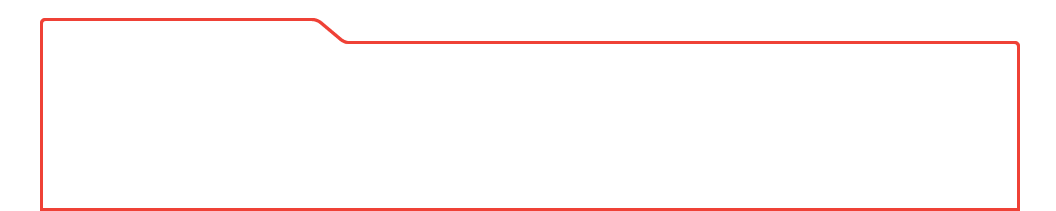
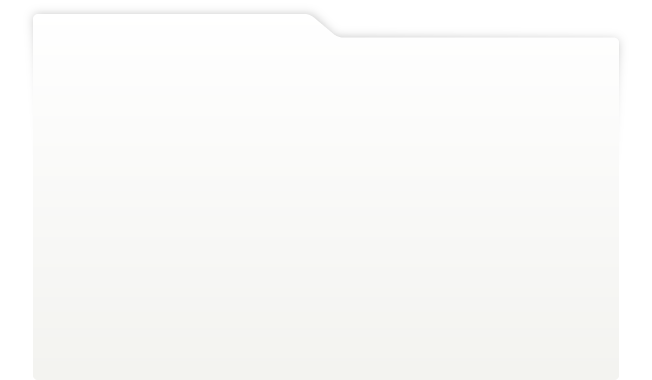
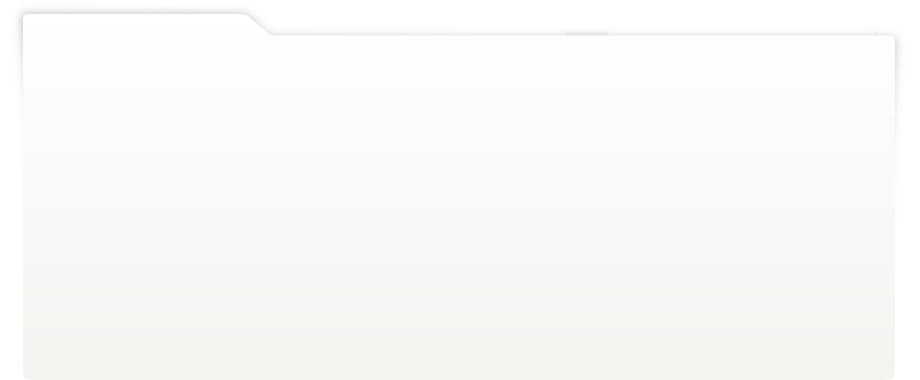
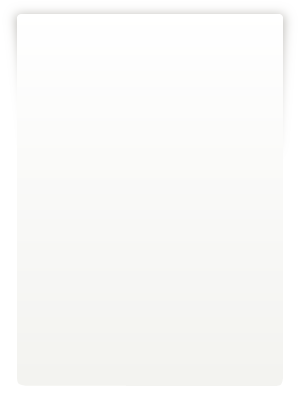
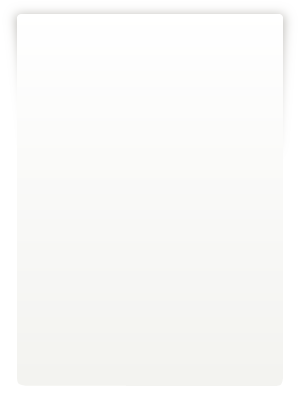
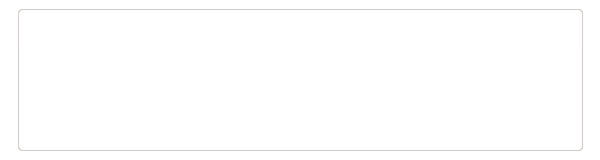
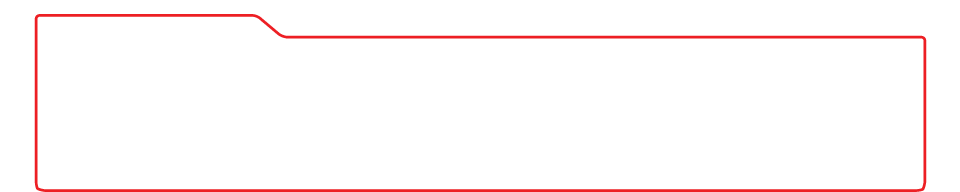
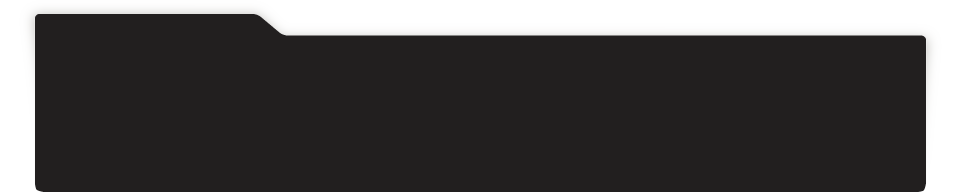
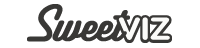
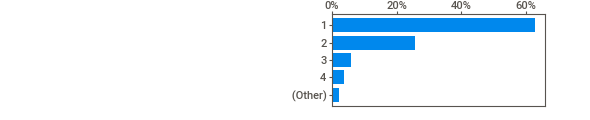
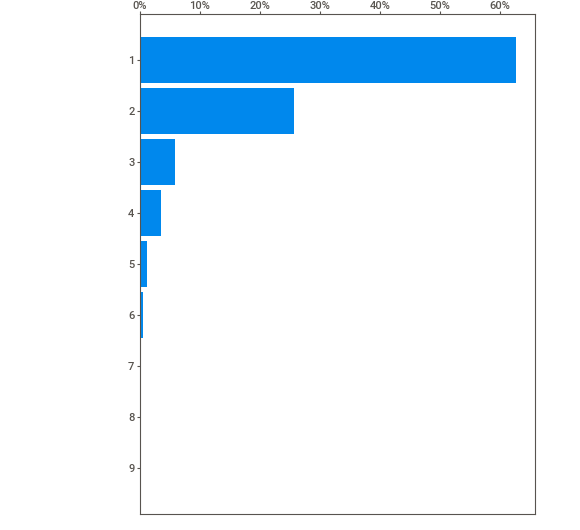
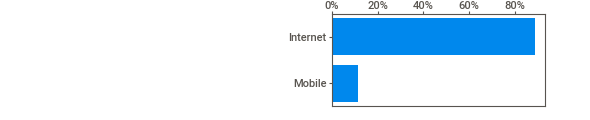
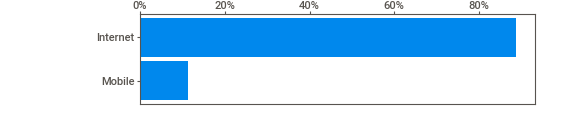
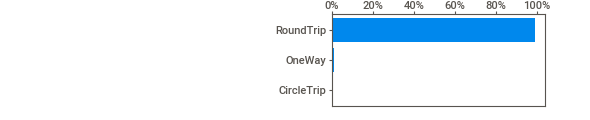
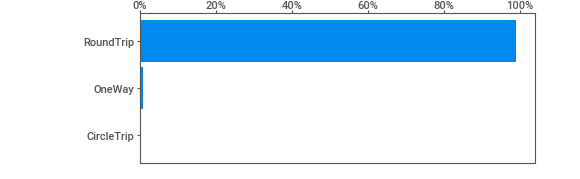
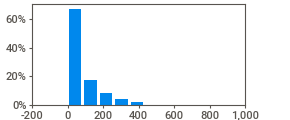
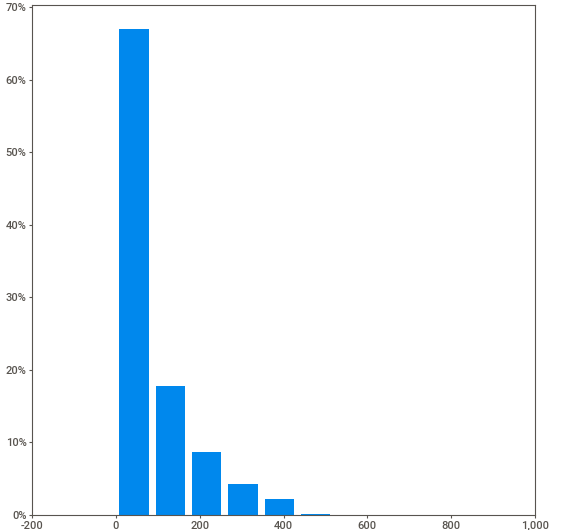
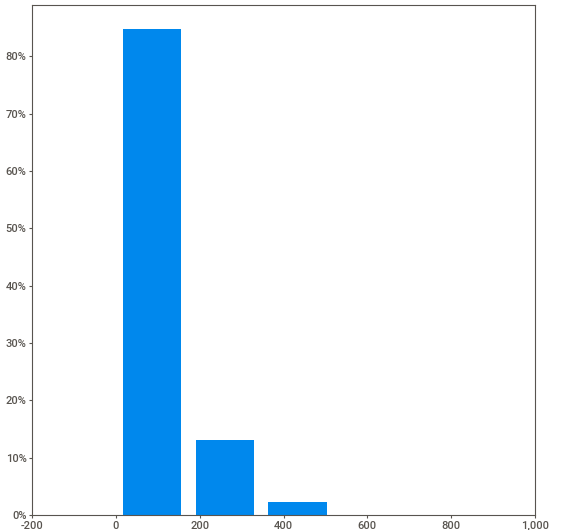
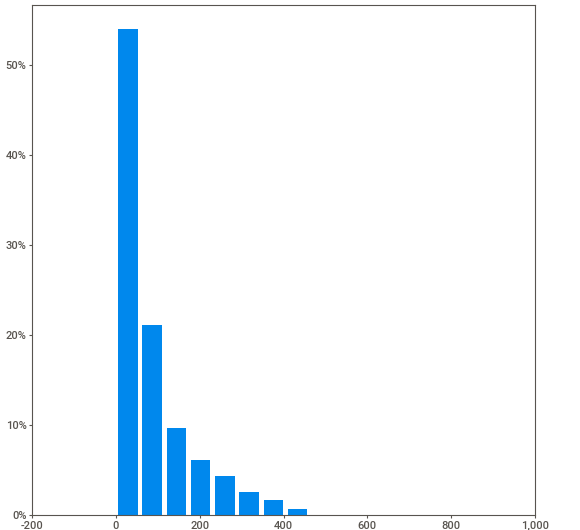
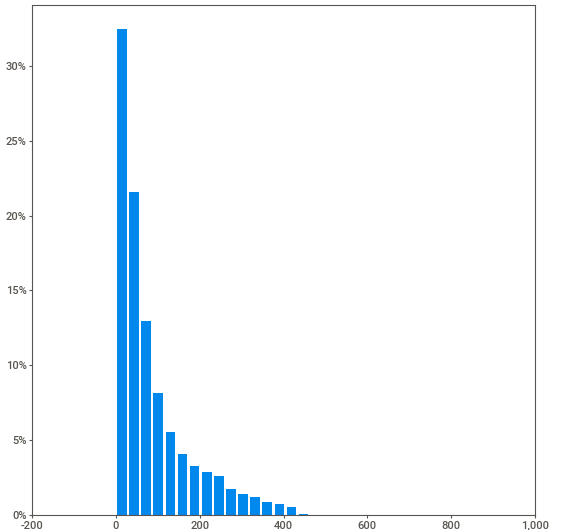
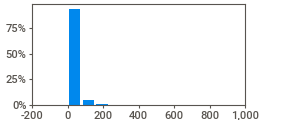
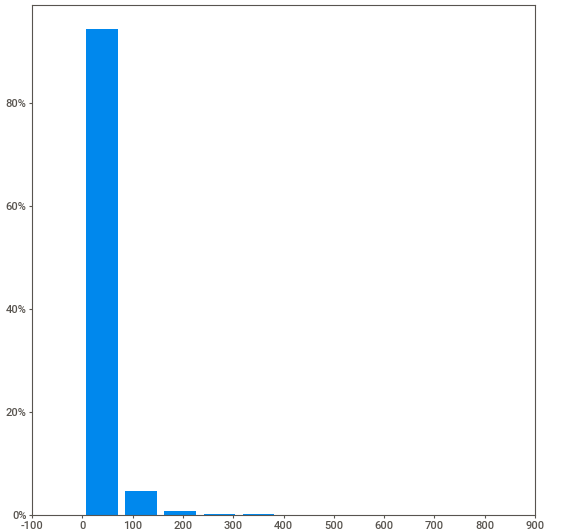
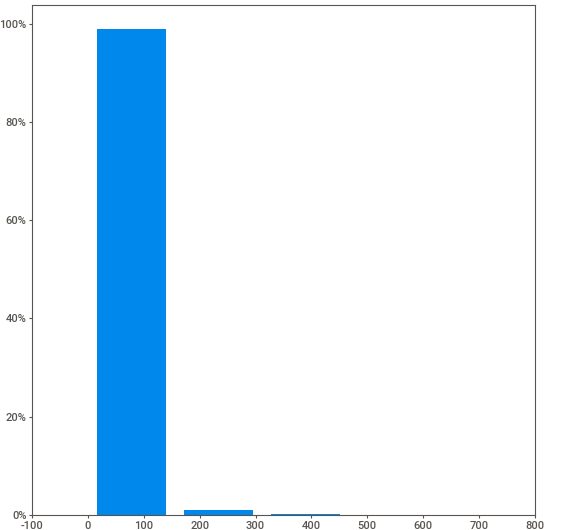
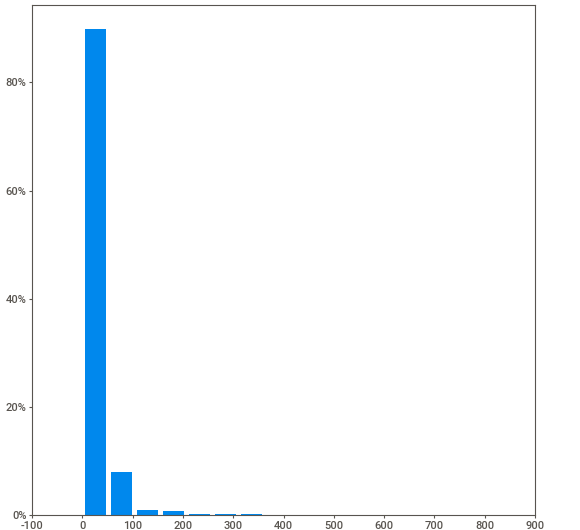
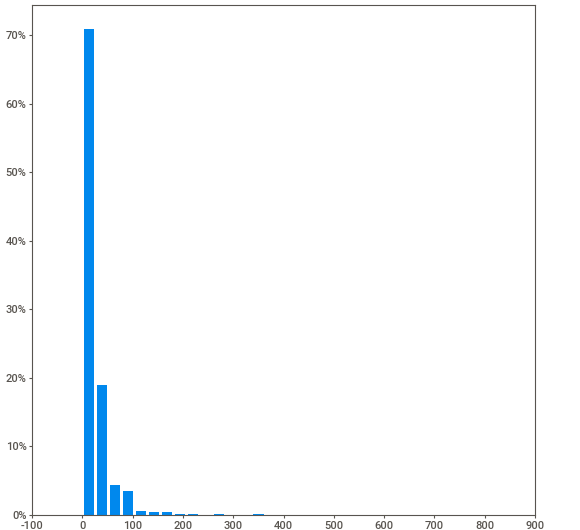
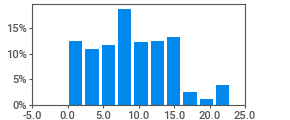
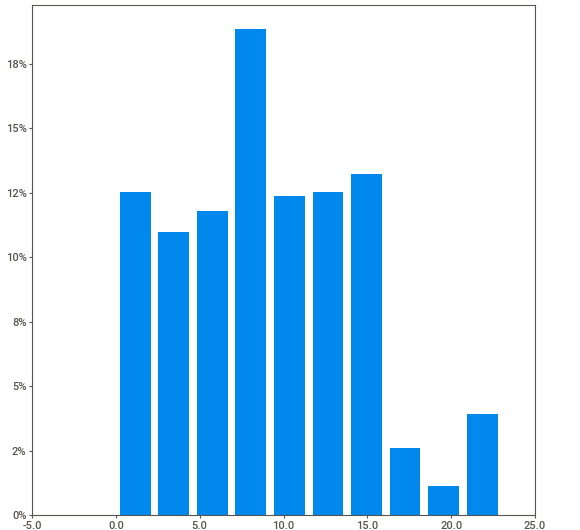
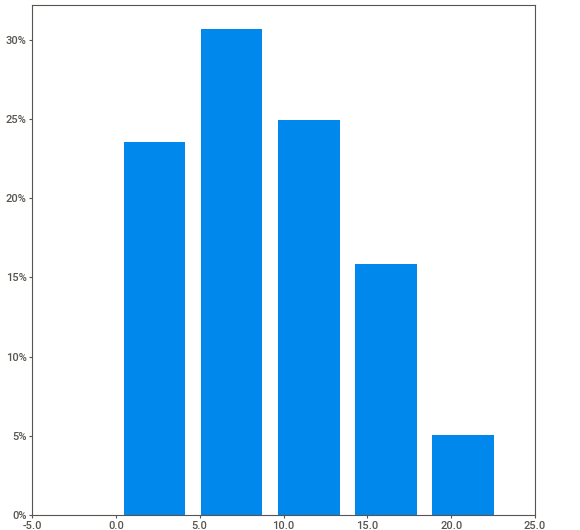
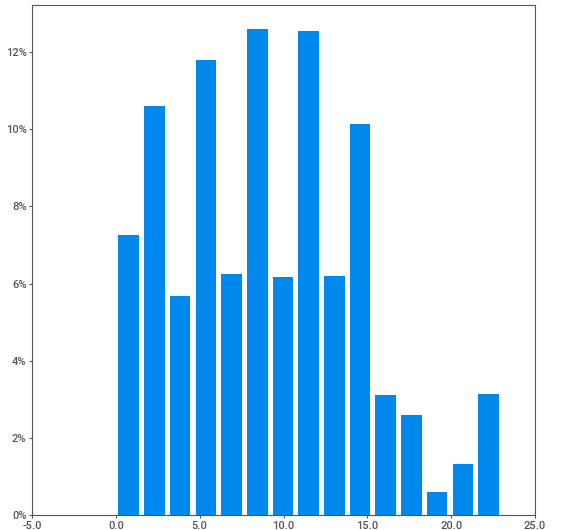
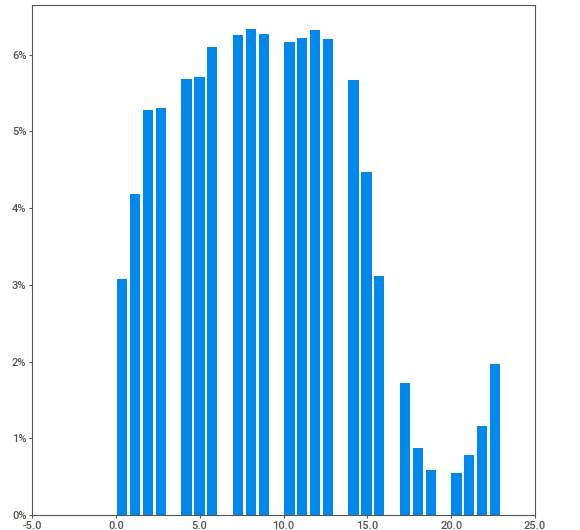
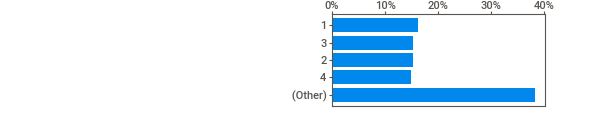
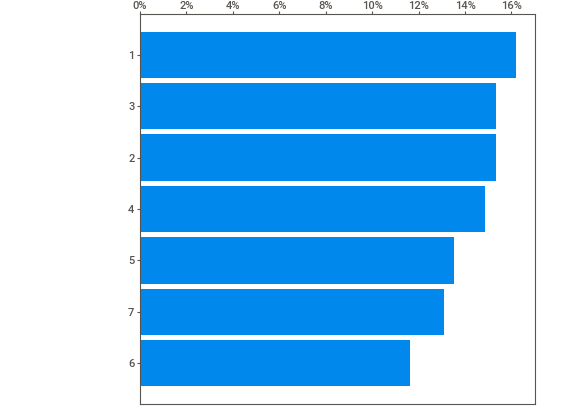
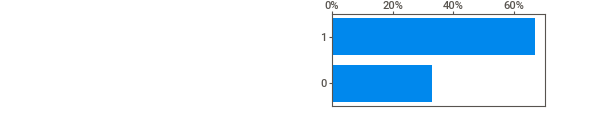
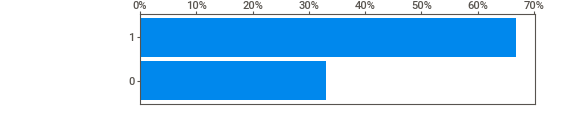
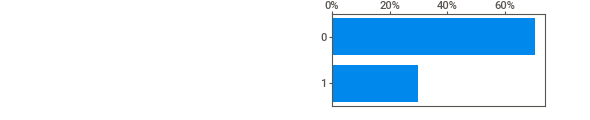
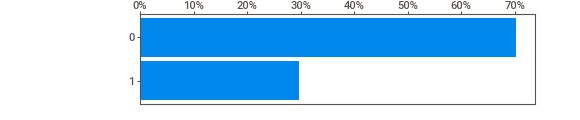
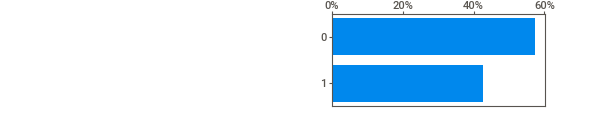
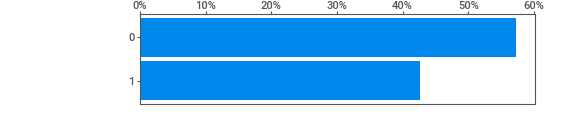
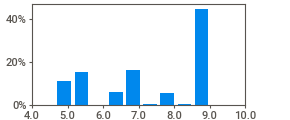
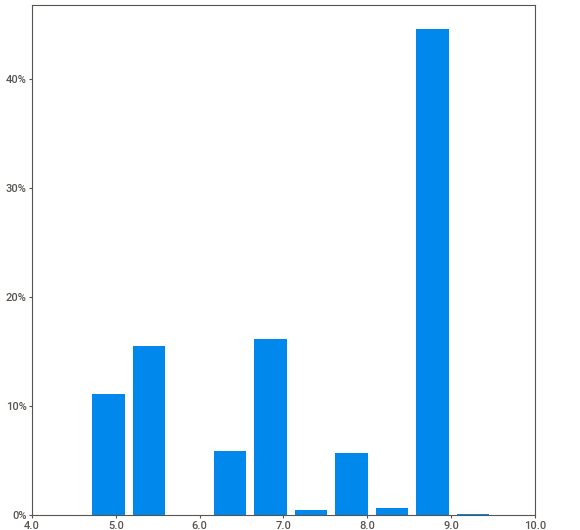
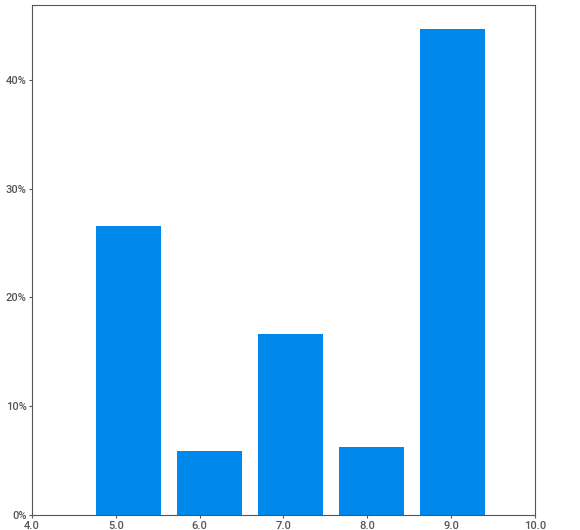
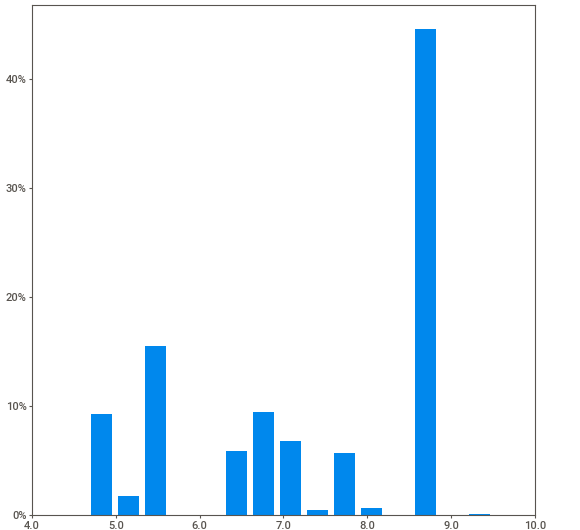
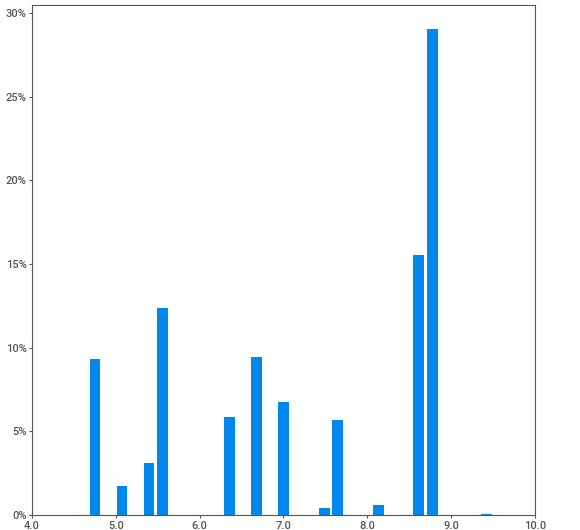
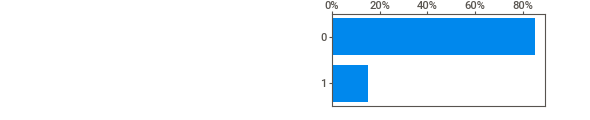
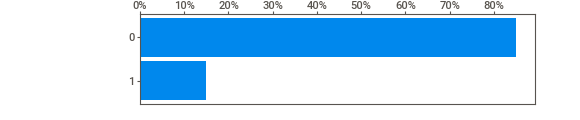
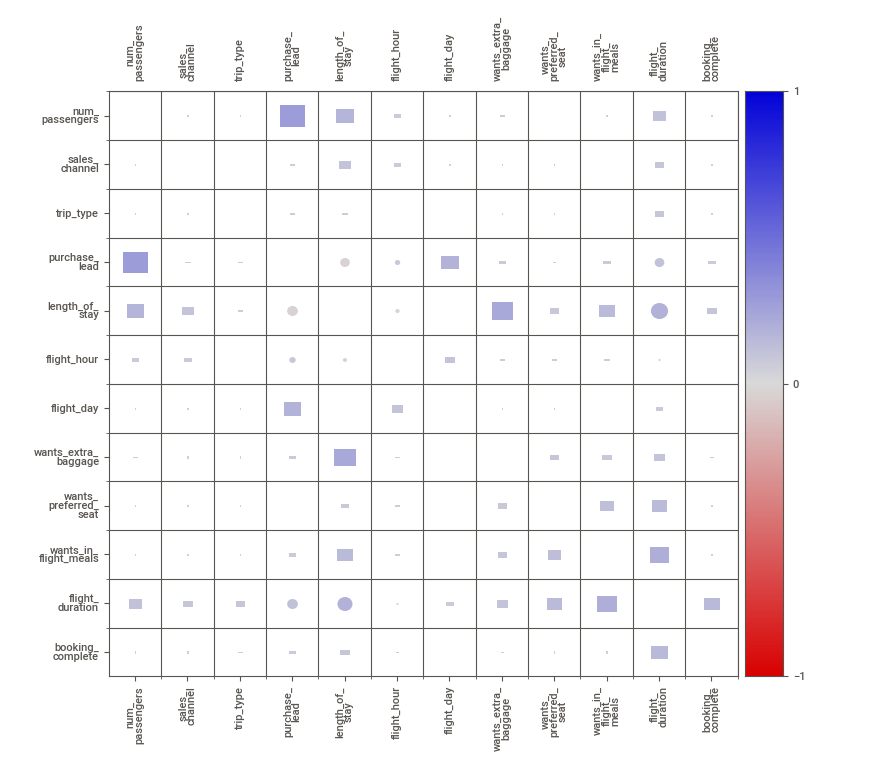
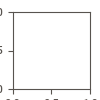

In [21]:
viz.show_notebook()

## FEATURE ENGINEERING

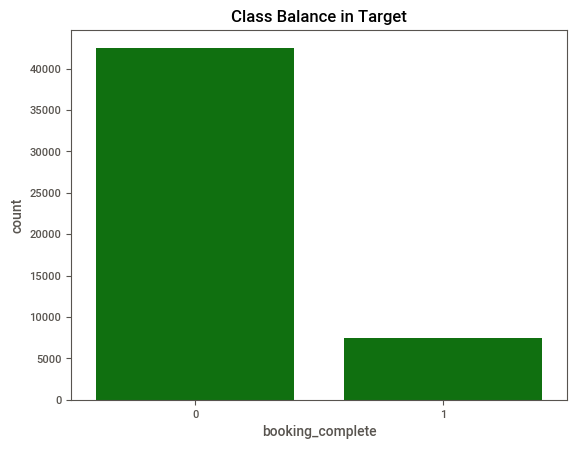

In [22]:
#class imbalance seen in data
# CHECKING FOR BALANCE IN DATASET

sns.countplot(data = df, x = 'booking_complete', color = 'green')
plt.title("Class Balance in Target")
plt.show()

# The data is heavily imbalanced. Its important to balance classes so that the model does not have any bias
# while training


In [28]:
#splitting data into X and Y
X=df.drop(['booking_complete','sales_channel','trip_type','booking_origin', 'route'],axis=1)
Y=df['booking_complete']

In [29]:
#SMOTE TO BALANCE DATASETS-synthetically creating minority oversample to balance
# DATA PREPARATION

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X,Y)

In [62]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [30]:
print(X_smote.shape)
print(Y_smote.shape)

(85044, 9)
(85044,)


In [66]:
X_smote,Y_smote

(array([[ 0.53443572,  1.9921658 , -0.07438854, ..., -0.55654238,
         -0.73286282, -1.08873258],
        [-0.53789061,  0.32606455, -0.04455947, ..., -0.55654238,
         -0.73286282, -1.08873258],
        [ 0.53443572,  1.78112631,  0.01509868, ...,  1.79680836,
         -0.73286282, -1.08873258],
        ...,
        [-0.53789061, -0.62916683, -0.46216652, ...,  1.79680836,
          1.36451185,  0.18672865],
        [ 0.53443572,  0.89253898, -0.49199559, ..., -0.55654238,
          1.36451185, -0.03871858],
        [-0.53789061, -0.7291329 ,  0.01509868, ..., -0.55654238,
         -0.73286282,  1.16938961]]),
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 85039    1
 85040    1
 85041    1
 85042    1
 85043    1
 Name: booking_complete, Length: 85044, dtype: int64)

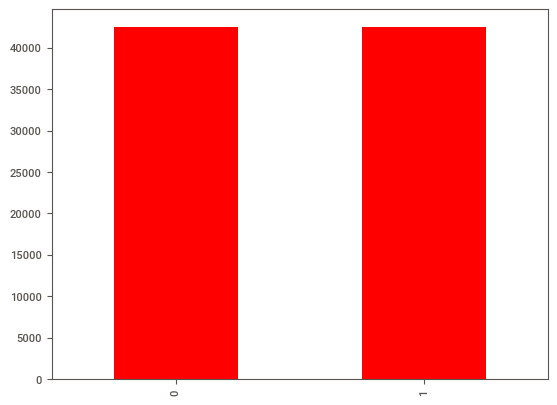

In [34]:
Y_smote.value_counts().plot(kind = 'bar', color = 'red')
plt.show()

# This shows that the dataset is now balanced

In [42]:
# STANDARDISING DATA

# Using StandardScaler 

sc = StandardScaler()

X_smote = sc.fit_transform(X_smote)
X_smote, Y_smote

# Transforming and standardising X_smote data to ensure data is in the same range. Standard scaler is used for 
# data having normal distribution and to rescale the values between -1 and 1. This is done by subtracting by mean and 
# dividing by standard deviation


X_smote.shape,Y_smote.shape

((85044, 9), (85044,))

In [45]:
# SPLITTING DATA SET

X_train, X_test, y_train, y_test = train_test_split(X_smote,Y_smote, test_size=0.3,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(59530, 9)
(25514, 9)
(59530,)
(25514,)


## MODEL BUILDING

In [46]:
# MODEL BUILDING AND EVALUATION METRICS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import cross_val_score

In [53]:
rand_clf = RandomForestClassifier(n_estimators = 500, random_state = 42, max_depth = 50,min_samples_split = 5)
rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of RandomForest Classifier: {:.2f}%".format(accuracy*100))



Accuracy of RandomForest Classifier: 86.41%


In [76]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[11270,  1455],
       [ 2012, 10777]])

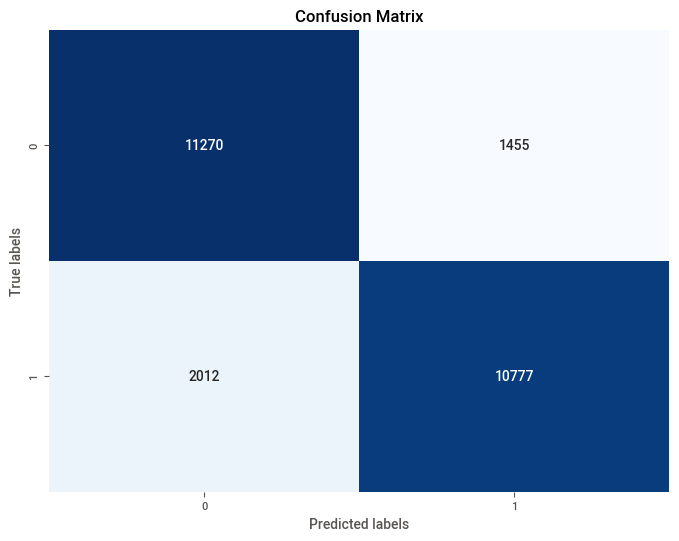

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [50]:
print(confusion_matrix(y_test, y_pred))

[[11273  1452]
 [ 2051 10738]]


In [51]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
RFclf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(RFclf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: {:.2f}%".format(grid_search.best_score_*100))


Best parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 85.50%


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     12725
           1       0.88      0.84      0.86     12789

    accuracy                           0.86     25514
   macro avg       0.86      0.86      0.86     25514
weighted avg       0.86      0.86      0.86     25514



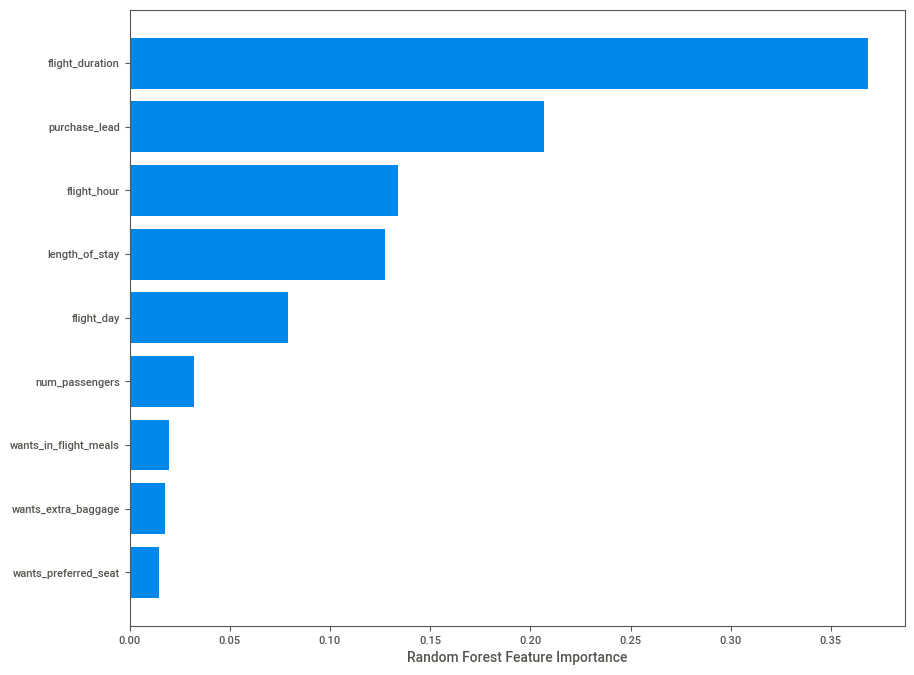

In [72]:
plt.figure(figsize=(10,8))
sorted_idx = rand_clf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rand_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

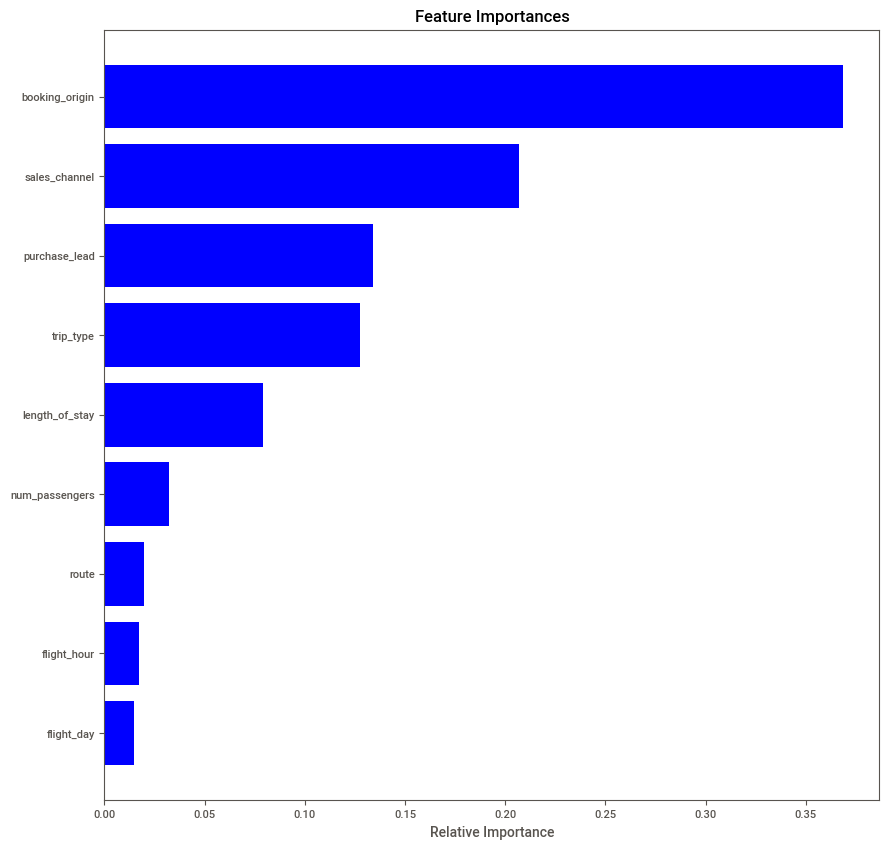

In [80]:
# plottting the features in order of importance

features = [i.split("__")[0] for i in df.columns]
importances = rand_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [81]:
features

['num_passengers',
 'sales_channel',
 'trip_type',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'route',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete']

In [82]:
importances

array([0.03225347, 0.2069199 , 0.12763651, 0.13404307, 0.07899562,
       0.0174778 , 0.01474056, 0.01956549, 0.36836759])

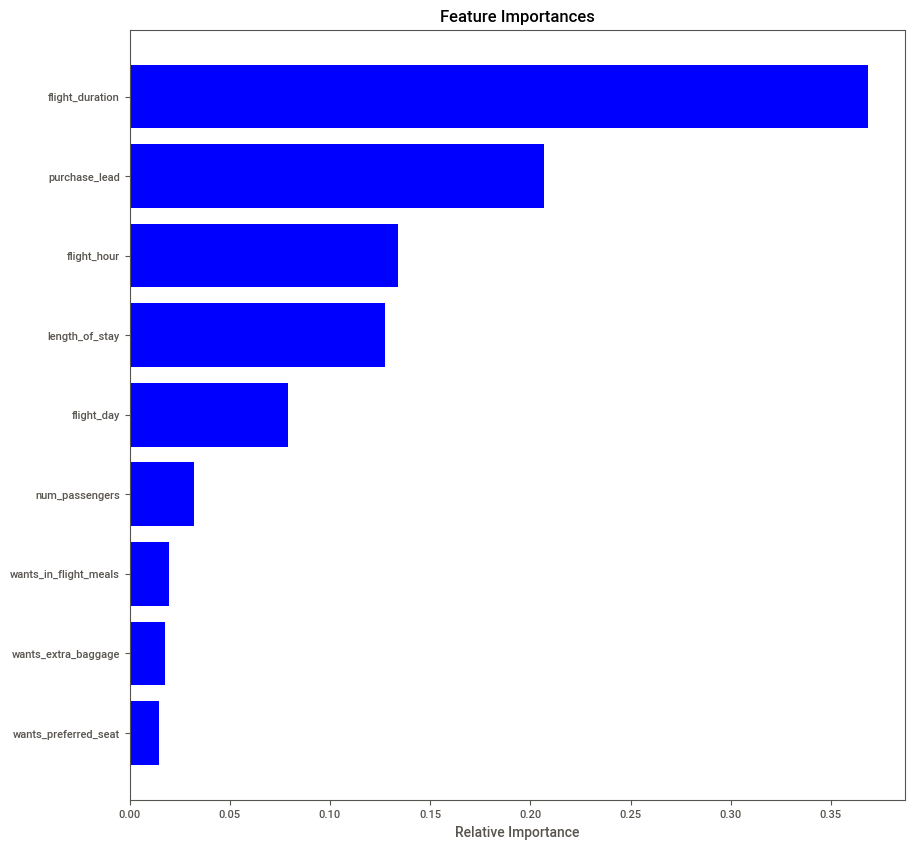

In [83]:

features = [i.split("__")[0] for i in X.columns]
importances = rand_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()